In [164]:
import torch
import numpy as np
import pandas as pd
from torch import nn #building blocks for neural nets in pytorch
import matplotlib.pyplot as plt

torch.__version__

'1.13.0+cu117'

In [165]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [166]:
"""
Data => build/pick a model => pick a loss func => training loop
Fit model to the data => Evaluate the model
Save and reload the trained model

"""

'\nData => build/pick a model => pick a loss func => training loop\nFit model to the data => Evaluate the model\nSave and reload the trained model\n\n'

In [167]:
"""
Types of data:
    Excel
    Images
    Videos
    Audio
    DNA
    Text

1. Get data into a numerical representation
2. Build a model to learn the patterns in the numerical representation
"""

'\nTypes of data:\n    Excel\n    Images\n    Videos\n    Audio\n    DNA\n    Text\n\n1. Get data into a numerical representation\n2. Build a model to learn the patterns in the numerical representation\n'

In [168]:
# creating known parameters
weight = 0.7
bias = 0.3
# create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight*X + bias

X[:10], X.shape, y[:10], y.shape

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 torch.Size([50, 1]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 torch.Size([50, 1]))

In [169]:
# split into training, validation and test sets
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [170]:
def plot_predictions(train_data = X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=None):
    """
    plot training data, test data nd compare predictions
    """
    
    plt.figure(figsize=(10, 7))
    
    plt.scatter(train_data, train_labels, c='b', s=4, label="Training data")
    
    plt.scatter(test_data, test_labels, c='g', s=4, label="Testing data")
    
    if predictions is not None:
        plt.scatter(test_data, predictions, c='r', s=4, label="Predictions")
    plt.legend(prop={"size":14})

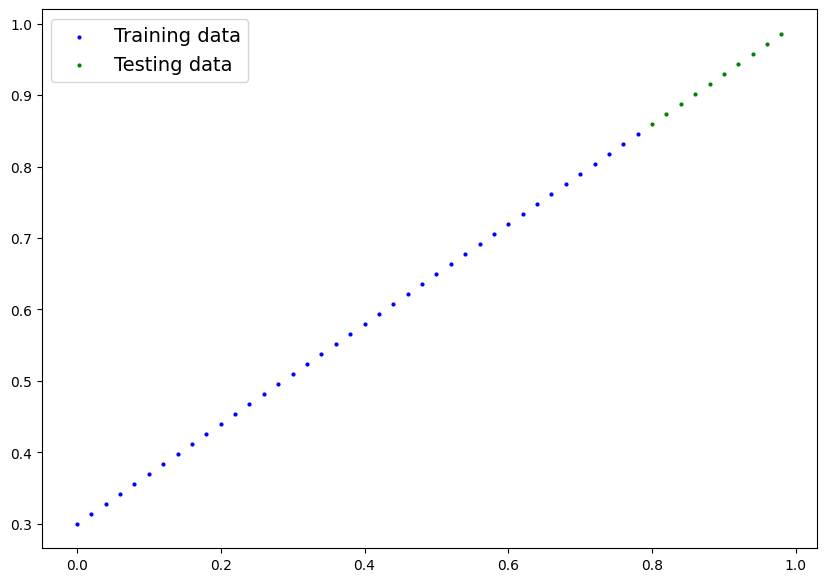

In [171]:
plot_predictions()

In [172]:
class LinearRegressionModel(nn.Module):# <- base class for all neural network modules
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                                requires_grad=True,
                                                dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype=torch.float))
    # forward method to define the computation
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias
         

### pytorch model building essentials

* torch.nn - contains all building blocks for computational graphs
* toch.nn.Parameter - parameters that a model tries to learn, toch.nn will set these for us
* torch.nn.Module - base class for all neural network modules, overwrite forward method if Module is subclassed
* torch.optim - optimizer, helps with gradient descent
* def forward() - forward propagation
* torch.utils.data.Dataset - represents a map between key value pairs of data
* torch.utils.data.DataLoader - creates a python iterable over a torch Dataset

In [173]:
# create a random seed
torch.manual_seed(42)

# subclass of nn.Module
model_0 = LinearRegressionModel()
model_0

LinearRegressionModel()

In [174]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [175]:
# list named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [176]:
with torch.inference_mode():
    y_pred = model_0(X_test)
y_pred

## similar with torch.no_grad(), torch.inference_mode() is preferred

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [177]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

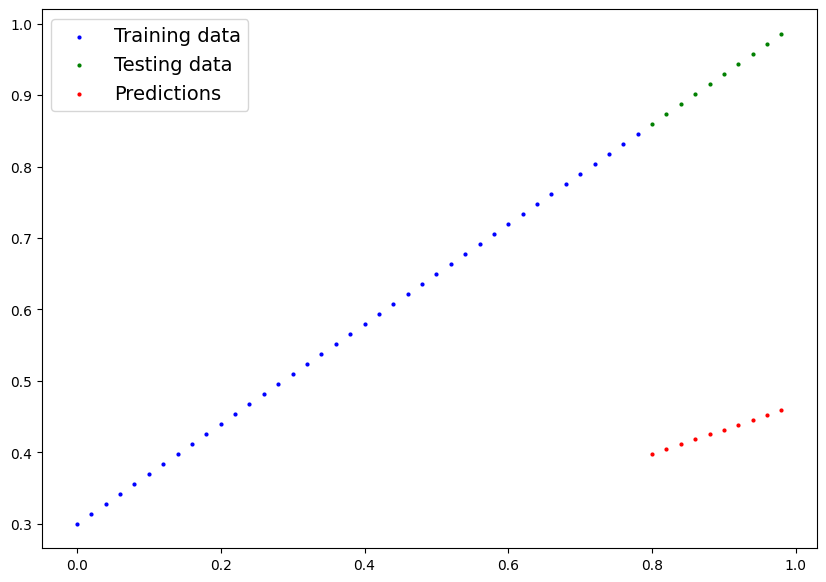

In [178]:
plot_predictions(predictions=y_pred)

###Training Model
   * Use a loss function: Function to measure the difference between real y values and predicted y values
   * Optimizer: Takes into account the loss function and adjusts the model's parameters

In [179]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [180]:
# setup a loss function
loss_fn = nn.L1Loss()

# setup an optimizer
optimizer = torch.optim.SGD(model_0.parameters(), lr=0.01)#lr = learning rate

In [181]:
epochs = 200

# track different values
epoch_count = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
    # sets all parameters required for gradient
    model_0.train()
    
    # forward pass
    y_pred = model_0(X_train)
    
    # calculate the loss
    loss = loss_fn(y_pred, y_train)
    #zero out the gradients in the optimizer
    optimizer.zero_grad()
    
    # backpropagation
    loss.backward()
    
    # use the optimizer
    optimizer.step()
    
    ###Testing
    # turns off different settings in the model not needed for evaluation/testing
    model_0.eval()
    with torch.inference_mode():#turns off gradient tracking & other things, that are not required for testing
        # just use forward pass
        test_pred = model_0(X_test)
        
        # calculate the test loss
        test_loss = loss_fn(test_pred, y_test)
        if epoch % 10 == 0:
            epoch_count.append(epoch)
            loss_values.append(loss)
            test_loss_values.append(test_loss)
            print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")
        

Epoch: 0 | Loss: 0.31288138031959534 | Test Loss: 0.48106518387794495
Epoch: 10 | Loss: 0.1976713240146637 | Test Loss: 0.3463551998138428
Epoch: 20 | Loss: 0.08908725529909134 | Test Loss: 0.21729660034179688
Epoch: 30 | Loss: 0.053148526698350906 | Test Loss: 0.14464017748832703
Epoch: 40 | Loss: 0.04543796554207802 | Test Loss: 0.11360953003168106
Epoch: 50 | Loss: 0.04167863354086876 | Test Loss: 0.09919948130846024
Epoch: 60 | Loss: 0.03818932920694351 | Test Loss: 0.08886633068323135
Epoch: 70 | Loss: 0.03476089984178543 | Test Loss: 0.0805937647819519
Epoch: 80 | Loss: 0.03132382780313492 | Test Loss: 0.07232122868299484
Epoch: 90 | Loss: 0.02788739837706089 | Test Loss: 0.06473556160926819
Epoch: 100 | Loss: 0.024458957836031914 | Test Loss: 0.05646304413676262
Epoch: 110 | Loss: 0.021020207554101944 | Test Loss: 0.04819049686193466
Epoch: 120 | Loss: 0.01758546568453312 | Test Loss: 0.04060482233762741
Epoch: 130 | Loss: 0.014155393466353416 | Test Loss: 0.03233227878808975
Ep

In [182]:
epoch_count, loss_values, test_loss_values

([0,
  10,
  20,
  30,
  40,
  50,
  60,
  70,
  80,
  90,
  100,
  110,
  120,
  130,
  140,
  150,
  160,
  170,
  180,
  190],
 [tensor(0.3129, grad_fn=<MeanBackward0>),
  tensor(0.1977, grad_fn=<MeanBackward0>),
  tensor(0.0891, grad_fn=<MeanBackward0>),
  tensor(0.0531, grad_fn=<MeanBackward0>),
  tensor(0.0454, grad_fn=<MeanBackward0>),
  tensor(0.0417, grad_fn=<MeanBackward0>),
  tensor(0.0382, grad_fn=<MeanBackward0>),
  tensor(0.0348, grad_fn=<MeanBackward0>),
  tensor(0.0313, grad_fn=<MeanBackward0>),
  tensor(0.0279, grad_fn=<MeanBackward0>),
  tensor(0.0245, grad_fn=<MeanBackward0>),
  tensor(0.0210, grad_fn=<MeanBackward0>),
  tensor(0.0176, grad_fn=<MeanBackward0>),
  tensor(0.0142, grad_fn=<MeanBackward0>),
  tensor(0.0107, grad_fn=<MeanBackward0>),
  tensor(0.0073, grad_fn=<MeanBackward0>),
  tensor(0.0039, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>)],
 [tensor(

Text(0.5, 0, 'epochs')

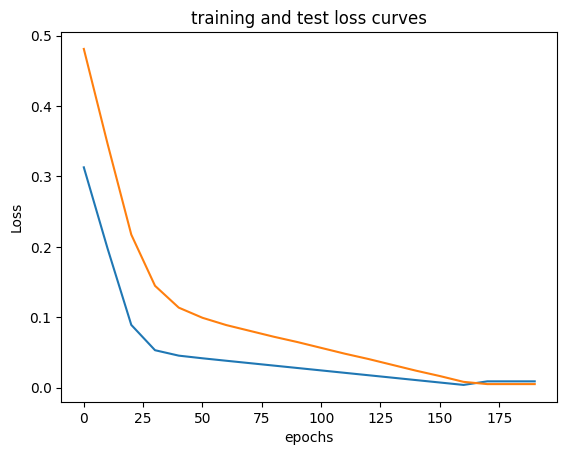

In [183]:
plt.plot(epoch_count, torch.tensor(loss_values).cpu().numpy(), label="Train loss")
plt.plot(epoch_count, torch.tensor(test_loss_values).cpu().numpy(), label="Test Loss")
plt.title("training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("epochs")

In [184]:
weight, bias, model_0.state_dict()

(0.7,
 0.3,
 OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))]))

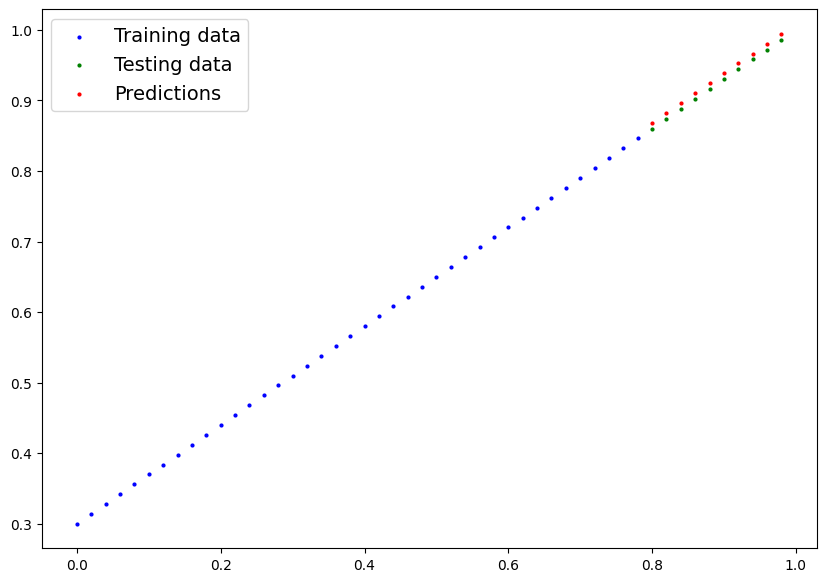

In [185]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)

plot_predictions(predictions=y_preds_new)

### saving a model in pytorch
Three methods for savinga and loading models:
* `torch.save()` - pytorch object in pickle format
* `torch.load()` - loads a saved pytorch object
* `torch.nn.Module.load_state_dict()` - allows to load a model's saved dictionary

In [186]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [187]:
from pathlib import Path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "01_pytorch_workflow.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

In [188]:
!ls -l models

total 4
-rw-rw-r-- 1 aabhushan aabhushan 1111 Nov 21 21:44 01_pytorch_workflow.pth


In [189]:
### loading pytorch model
loaded_model_0 = LinearRegressionModel()
#load the model
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [190]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

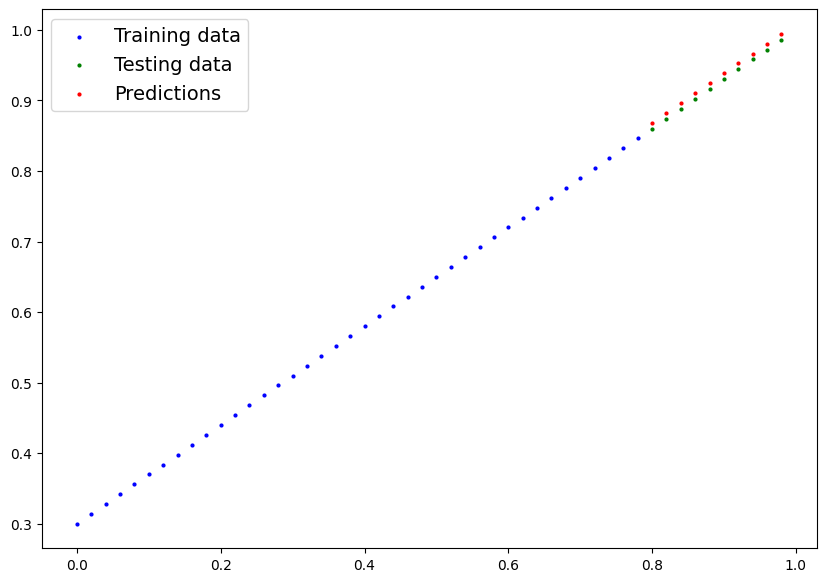

In [191]:
##Make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
    y_pred = loaded_model_0(X_test)
plot_predictions(predictions=y_pred)

### putting it all together


In [192]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


In [194]:
# create some data again
w = 0.4
b = 0.1

start = 0
end = 2
step = 0.05

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = w*X + b
X[:10], y[:10]

(tensor([[0.0000],
         [0.0500],
         [0.1000],
         [0.1500],
         [0.2000],
         [0.2500],
         [0.3000],
         [0.3500],
         [0.4000],
         [0.4500]]),
 tensor([[0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800]]))

In [195]:
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

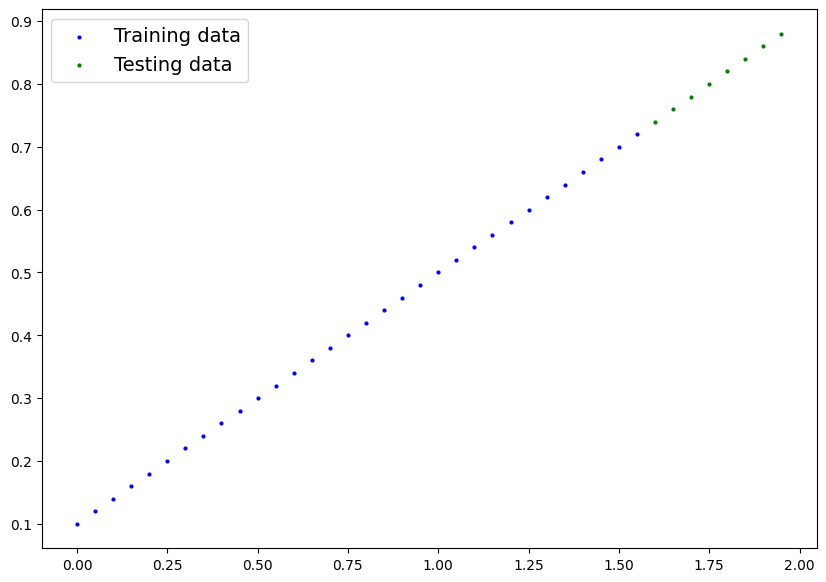

In [196]:
# plot the data
plot_predictions(X_train, y_train, X_test, y_test)

In [197]:
class Linear(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1, out_features=1)
    
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

torch.manual_seed(42)
model_1 = Linear()
model_1, model_1.state_dict()

(Linear(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [198]:
next(model_1.parameters()).device

device(type='cpu')

In [201]:
model_1.to(device)
next(model_1.parameters()).device

RuntimeError: CUDA error: CUDA-capable device(s) is/are busy or unavailable
CUDA kernel errors might be asynchronously reported at some other API call,so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.